# **Tales from the Crypto**

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
from newsapi import NewsApiClient
import re

nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ashweejshenoy/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()

True

In [4]:
# Create a newsapi client
api_key=os.getenv("NEWS_API_KEY")
newsapi=NewsApiClient(api_key=api_key)

In [5]:
# Fetch the Bitcoin news articles
bitcoin_articles=newsapi.get_everything(
                q="bitcoin",
                language="en",
                sort_by="relevancy"
)

bitcoin_articles["totalResults"]

print(f"Total number of Bitcoin articles: {bitcoin_articles['totalResults']}")

Total number of Bitcoin articles: 7609


In [6]:
# Fetch the Ethereum news articles
ethereum_articles=newsapi.get_everything(
                q="ethereum NOT bitcoin",
                language="en",
                sort_by="relevancy"

)

print(f"Total number of Ethereum articles: {ethereum_articles['totalResults']}")

Total number of Ethereum articles: 745


In [7]:
ethereum_articles["articles"][0]

{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'Connie Loizos',
 'title': 'Crypto investors like Terraform Labs so much, they’re committing $150 million to its ‘ecosystem’',
 'description': 'There are many blockchain platforms competing for investors’ and developers’ attention right now, from the big daddy of them all, Ethereum, to so-called “Ethereum Killers” like Solana, which we wrote about in May. Often, these technologies are seen as so prom…',
 'url': 'http://techcrunch.com/2021/07/16/crypto-investors-like-terraform-labs-so-much-theyre-committing-150-million-to-its-ecosystem/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2020/06/GettyImages-1174590894.jpg?w=667',
 'publishedAt': '2021-07-16T16:00:55Z',
 'content': 'There are many blockchain platforms competing for investors’ and developers’ attention right now, from the big daddy of them all, Ethereum, to so-called “Ethereum Killers” like Solana, which we wrote… [+2563 chars]'}

In [8]:
# Sentiment calculation based on compound score
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

In [9]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments=[]

for article in ethereum_articles["articles"]:
    title=article['title']
    description=article['description']
    text=article["content"]
    date=article['publishedAt'][:10]
    
    sentiment=analyzer.polarity_scores(title)
    title_compound=sentiment["compound"]
    title_pos=sentiment["pos"]
    title_neu=sentiment["neu"]
    title_neg=sentiment["neg"]
    title_sent= get_sentiment(title_compound)
    
    sentiment=analyzer.polarity_scores(text)
    txt_compound=sentiment["compound"]
    txt_pos=sentiment["pos"]
    txt_neu=sentiment["neu"]
    txt_neg=sentiment["neg"]
    txt_sent= get_sentiment(txt_compound)
    
    ethereum_sentiments.append({
        "title":title,
        "description":description,
        "text":text,
        "date":date,
        
        "title_compound":title_compound,
        "title_positive":title_pos,
        "title_negative":title_neg,
        "title_neutral":title_neu,
        "title_sent":title_sent,
        
        "txt_compound":txt_compound,
        "txt_positive":txt_pos,
        "txt_negative":txt_neg,
        "txt_neutral":txt_neu,
        "txt_sent":txt_sent
        
        
    })
    
ethereum_df=pd.DataFrame(ethereum_sentiments)
ethereum_df.head()

,title,description,text,date,title_compound,title_positive,title_negative,title_neutral,title_sent,txt_compound,txt_positive,txt_negative,txt_neutral,txt_sent
0,"Crypto investors like Terraform Labs so much, ...",There are many blockchain platforms competing ...,There are many blockchain platforms competing ...,2021-07-16,0.4703,0.253,0.000,0.747,1,0.3612,0.075,0.0,0.925,1
1,"Cent, the platform that Jack Dorsey used to se...",Cent was founded in 2017 as an ad-free creator...,Cent was founded in 2017 as an ad-free creator...,2021-08-05,0.0000,0.000,0.000,1.000,0,0.6956,0.190,0.0,0.810,1
2,Ethereum major upgrade activated; ether stays ...,"A major software upgrade on Ethereum, the seco...",Representation of the Ethereum virtual currenc...,2021-08-05,-0.2960,0.000,0.239,0.761,-1,0.0000,0.000,0.0,1.000,0
3,Ether near two-month high ahead of major proto...,Ether held near two-month highs on Thursday a...,"HONG KONG, Aug 5 (Reuters) - Ether held near t...",2021-08-05,0.0000,0.000,0.000,1.000,0,0.0000,0.000,0.0,1.000,0
4,Livepeer snags $20M for decentralized video tr...,Livepeer has raised $20 million for its decent...,All the sessions from Transform 2021 are avail...,2021-07-29,0.0000,0.000,0.000,1.000,0,0.0000,0.000,0.0,1.000,0


In [10]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments=[]

for article in bitcoin_articles["articles"]:
    title=article['title']
    description=article['description']
    text=article["content"]
    date=article['publishedAt'][:10]
    
    sentiment=analyzer.polarity_scores(title)
    title_compound=sentiment["compound"]
    title_pos=sentiment["pos"]
    title_neu=sentiment["neu"]
    title_neg=sentiment["neg"]
    title_sent= get_sentiment(title_compound)
    
    sentiment=analyzer.polarity_scores(text)
    txt_compound=sentiment["compound"]
    txt_pos=sentiment["pos"]
    txt_neu=sentiment["neu"]
    txt_neg=sentiment["neg"]
    txt_sent= get_sentiment(txt_compound)
    
    bitcoin_sentiments.append({
        "title":title,
        "description":description,
        "text":text,
        "date":date,
        
        "title_compound":title_compound,
        "title_positive":title_pos,
        "title_negative":title_neg,
        "title_neutral":title_neu,
        "title_sent":title_sent,
        
        "txt_compound":txt_compound,
        "txt_positive":txt_pos,
        "txt_negative":txt_neg,
        "txt_neutral":txt_neu,
        "txt_sent":txt_sent
        
        
    })
    
bitcoin_df=pd.DataFrame(bitcoin_sentiments)
bitcoin_df.head()

,title,description,text,date,title_compound,title_positive,title_negative,title_neutral,title_sent,txt_compound,txt_positive,txt_negative,txt_neutral,txt_sent
0,Why Not Use Self-Driving Cars as Supercomputers?,Autonomous vehicles use the equivalent of 200 ...,"Like Dogecoin devotees, the mayor of Reno, and...",2021-07-19,0.0000,0.000,0.000,1.000,0,0.6908,0.178,0.000,0.822,1
1,Kaseya ransomware attackers demand $70 million...,Three days after ransomware attackers hijacked...,Filed under:\r\nThe supply chain attack has re...,2021-07-05,-0.8126,0.000,0.483,0.517,-1,-0.5719,0.111,0.184,0.705,-1
2,Gang behind huge cyber-attack demands $70m in ...,"The authors of a ""colossal"" ransomware attack ...",image copyrightGetty Images\r\nThe gang behind...,2021-07-05,0.3182,0.247,0.000,0.753,1,-0.6124,0.000,0.143,0.857,-1
3,Daily Crunch: Bitcoin ‘is a big part of our fu...,"Hello friends and welcome to Daily Crunch, bri...",To get a roundup of TechCrunchs biggest and mo...,2021-07-23,0.0000,0.000,0.000,1.000,0,0.6240,0.127,0.000,0.873,1
4,Crypto startup Phantom banks funding from Andr...,While retail investors grew more comfortable b...,While retail investors grew more comfortable b...,2021-07-14,0.0000,0.000,0.000,1.000,0,0.7264,0.164,0.000,0.836,1


### **Analyzing Sentiments Results**

<AxesSubplot:title={'center':'Bitcoin - News Title and Text Sentiment Comparison'}>

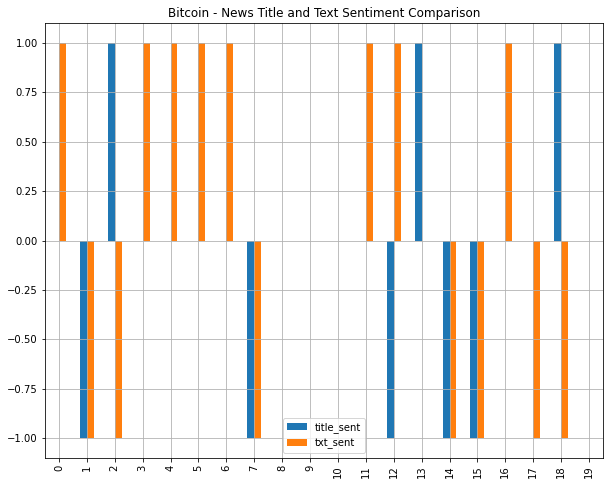

In [11]:
# Plot bar chart
bitcoin_df.plot(
    y=["title_sent", "txt_sent"],
    kind="bar",
    title="Bitcoin - News Title and Text Sentiment Comparison",
    figsize=(10, 8),
    grid=True,
)

<AxesSubplot:title={'center':'Ethereum - News Title and Text Sentiment Comparison'}>

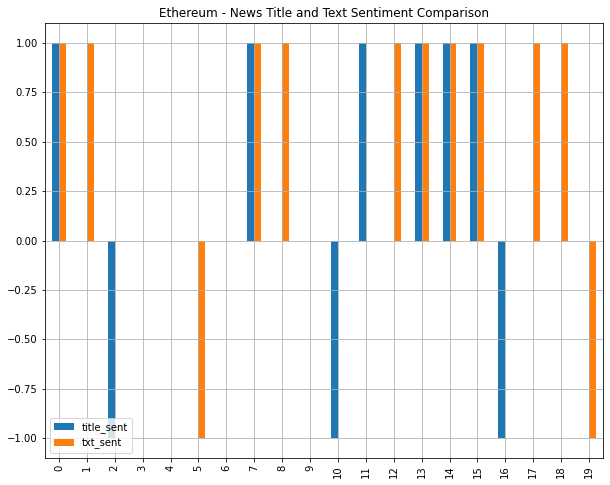

In [12]:
ethereum_df.plot(
    y=["title_sent", "txt_sent"],
    kind="bar",
    title="Ethereum - News Title and Text Sentiment Comparison",
    figsize=(10, 8),
    grid=True,
)

In [13]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,title_compound,title_positive,title_negative,title_neutral,title_sent,txt_compound,txt_positive,txt_negative,txt_neutral,txt_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,-0.057905,0.045750,0.078500,0.875750,-0.100000,-0.019345,0.058500,0.059750,0.881750,0.050000
std,0.263197,0.099279,0.135392,0.175543,0.640723,0.484055,0.058633,0.090311,0.101771,0.887041
min,-0.812600,0.000000,0.000000,0.458000,-1.000000,-0.827100,0.000000,0.000000,0.653000,-1.000000
25%,-0.056575,0.000000,0.000000,0.760500,-0.250000,-0.405525,0.000000,0.000000,0.836000,-1.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.056000,0.000000,0.906000,0.000000
75%,0.000000,0.000000,0.194750,1.000000,0.000000,0.315000,0.092500,0.088250,0.940000,1.000000
max,0.433600,0.328000,0.483000,1.000000,1.000000,0.726400,0.178000,0.287000,1.000000,1.000000


In [14]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,title_compound,title_positive,title_negative,title_neutral,title_sent,txt_compound,txt_positive,txt_negative,txt_neutral,txt_sent
count,20.00000,20.00000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,-0.00118,0.05480,0.051550,0.893650,0.15000,0.155360,0.059200,0.023750,0.917050,0.400000
std,0.32973,0.09244,0.129291,0.138975,0.67082,0.340524,0.069824,0.048292,0.087396,0.680557
min,-0.80200,0.00000,0.000000,0.604000,-1.00000,-0.726900,0.000000,0.000000,0.750000,-1.000000
25%,0.00000,0.00000,0.000000,0.811250,0.00000,0.000000,0.000000,0.000000,0.822250,0.000000
50%,0.00000,0.00000,0.000000,1.000000,0.00000,0.051350,0.021500,0.000000,0.926500,0.500000
75%,0.10700,0.09950,0.000000,1.000000,1.00000,0.376275,0.100500,0.016750,1.000000,1.000000
max,0.47030,0.25900,0.396000,1.000000,1.00000,0.695600,0.190000,0.186000,1.000000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin has higher mean positive score for the text of news(0.058) against ethereum (0.051)

Q: Which coin had the highest compound score?

A: The maximum compound score is for bitcoin (max compound score of 0.72). When we look at mean compound score, ethereum has higher text compound score indicating higher positive sentiment towards ethereum compared to bitcoin

Q. Which coin had the highest positive score?

A: Bitcoin has max positive score for the text (0.178) against Ethereum(0.175)

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [15]:
#import necessary libraries
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [16]:
# Instantiate the lemmatizer
lemmatizer=WordNetLemmatizer()

# Create a list of stopwords
sw=set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addon=['reuters','of','the','an','a','by','of']

In [18]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    sw=set(stopwords.words('english'))
    sw_addon=['reuters','of','the','an','a','by','of']
    # Remove the punctuation from text
    regex=re.compile("[^a-zA-z ]")
    re_clean=regex.sub('',text)
    # Create a tokenized list of the words
    words=word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem=[lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase and Remove the stop words
    tokens = [word.lower() for word in lem if word.lower not in sw.union(sw_addon)]
    
    
    return tokens

In [19]:
# Create a new tokens column for Bitcoin
bitcoin_tokens = {
    'title_tokens': [],
    'text_tokens': [],
}

for i in range(len(bitcoin_df)):
    title_tokens=tokenizer(bitcoin_df.loc[i,"title"])
    txt_tokens=tokenizer(bitcoin_df.loc[i,"text"])
    
    bitcoin_tokens['title_tokens'].append(title_tokens)
    bitcoin_tokens['text_tokens'].append(txt_tokens)

bitcoin_tokens_df=pd.DataFrame(bitcoin_tokens)
bitcoin_df=bitcoin_df.join(bitcoin_tokens_df)
bitcoin_df.head()

,title,description,text,date,title_compound,title_positive,title_negative,title_neutral,title_sent,txt_compound,txt_positive,txt_negative,txt_neutral,txt_sent,title_tokens,text_tokens
0,Why Not Use Self-Driving Cars as Supercomputers?,Autonomous vehicles use the equivalent of 200 ...,"Like Dogecoin devotees, the mayor of Reno, and...",2021-07-19,0.0000,0.000,0.000,1.000,0,0.6908,0.178,0.000,0.822,1,"[why, not, use, selfdriving, cars, a, supercom...","[like, dogecoin, devotee, the, mayor, of, reno..."
1,Kaseya ransomware attackers demand $70 million...,Three days after ransomware attackers hijacked...,Filed under:\r\nThe supply chain attack has re...,2021-07-05,-0.8126,0.000,0.483,0.517,-1,-0.5719,0.111,0.184,0.705,-1,"[kaseya, ransomware, attacker, demand, million...","[filed, underthe, supply, chain, attack, ha, r..."
2,Gang behind huge cyber-attack demands $70m in ...,"The authors of a ""colossal"" ransomware attack ...",image copyrightGetty Images\r\nThe gang behind...,2021-07-05,0.3182,0.247,0.000,0.753,1,-0.6124,0.000,0.143,0.857,-1,"[gang, behind, huge, cyberattack, demand, m, i...","[image, copyrightgetty, imagesthe, gang, behin..."
3,Daily Crunch: Bitcoin ‘is a big part of our fu...,"Hello friends and welcome to Daily Crunch, bri...",To get a roundup of TechCrunchs biggest and mo...,2021-07-23,0.0000,0.000,0.000,1.000,0,0.6240,0.127,0.000,0.873,1,"[daily, crunch, bitcoin, is, a, big, part, of,...","[to, get, a, roundup, of, techcrunchs, biggest..."
4,Crypto startup Phantom banks funding from Andr...,While retail investors grew more comfortable b...,While retail investors grew more comfortable b...,2021-07-14,0.0000,0.000,0.000,1.000,0,0.7264,0.164,0.000,0.836,1,"[crypto, startup, phantom, bank, funding, from...","[while, retail, investor, grew, more, comforta..."


In [20]:
bitcoin_df["text_tokens"].head(10)

0    [like, dogecoin, devotee, the, mayor, of, reno...
1    [filed, underthe, supply, chain, attack, ha, r...
2    [image, copyrightgetty, imagesthe, gang, behin...
3    [to, get, a, roundup, of, techcrunchs, biggest...
4    [while, retail, investor, grew, more, comforta...
5    [as, longtime, techcrunch, reader, know, well,...
6    [singapore, july, reuters, bitcoin, broke, abo...
7    [james, martincneta, uk, man, wa, arrested, in...
8    [a, representation, of, virtual, currency, bit...
9    [by, reuters, stafffile, photo, a, representat...
Name: text_tokens, dtype: object

In [21]:
# Create a new tokens column for Ethereum
ethereum_tokens = {
    'title_tokens': [],
    'text_tokens': [],
}

for i in range(len(ethereum_df)):
    title_token=tokenizer(ethereum_df.loc[i,"title"])
    txt_token=tokenizer(ethereum_df.loc[i,"text"])
    
    ethereum_tokens['title_tokens'].append(title_token)
    ethereum_tokens['text_tokens'].append(txt_token)

ethereum_tokens_df=pd.DataFrame(ethereum_tokens)
ethereum_df=ethereum_df.join(ethereum_tokens_df)
ethereum_df.head()

,title,description,text,date,title_compound,title_positive,title_negative,title_neutral,title_sent,txt_compound,txt_positive,txt_negative,txt_neutral,txt_sent,title_tokens,text_tokens
0,"Crypto investors like Terraform Labs so much, ...",There are many blockchain platforms competing ...,There are many blockchain platforms competing ...,2021-07-16,0.4703,0.253,0.000,0.747,1,0.3612,0.075,0.0,0.925,1,"[crypto, investor, like, terraform, labs, so, ...","[there, are, many, blockchain, platform, compe..."
1,"Cent, the platform that Jack Dorsey used to se...",Cent was founded in 2017 as an ad-free creator...,Cent was founded in 2017 as an ad-free creator...,2021-08-05,0.0000,0.000,0.000,1.000,0,0.6956,0.190,0.0,0.810,1,"[cent, the, platform, that, jack, dorsey, used...","[cent, wa, founded, in, a, an, adfree, creator..."
2,Ethereum major upgrade activated; ether stays ...,"A major software upgrade on Ethereum, the seco...",Representation of the Ethereum virtual currenc...,2021-08-05,-0.2960,0.000,0.239,0.761,-1,0.0000,0.000,0.0,1.000,0,"[ethereum, major, upgrade, activated, ether, s...","[representation, of, the, ethereum, virtual, c..."
3,Ether near two-month high ahead of major proto...,Ether held near two-month highs on Thursday a...,"HONG KONG, Aug 5 (Reuters) - Ether held near t...",2021-08-05,0.0000,0.000,0.000,1.000,0,0.0000,0.000,0.0,1.000,0,"[ether, near, twomonth, high, ahead, of, major...","[hong, kong, aug, reuters, ether, held, near, ..."
4,Livepeer snags $20M for decentralized video tr...,Livepeer has raised $20 million for its decent...,All the sessions from Transform 2021 are avail...,2021-07-29,0.0000,0.000,0.000,1.000,0,0.0000,0.000,0.0,1.000,0,"[livepeer, snag, m, for, decentralized, video,...","[all, the, session, from, transform, are, avai..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [22]:
from collections import Counter
from nltk import ngrams

In [23]:
# Generate the Bitcoin N-grams where N=2
bitcoin_processed=[]
for i in range(len(bitcoin_df)):
    for item in bitcoin_df.loc[i,"text_tokens"]:
        if item not in ('[',']'):
            bitcoin_processed.append(item)

bitcoin_bigrams=ngrams(bitcoin_processed,n=2)

In [25]:
# Generate the Ethereum N-grams where N=2
ethereum_processed=[]
for i in range(len(bitcoin_df)):
    for item in ethereum_df.loc[i,"text_tokens"]:
        if item not in ('[',']'):
            ethereum_processed.append(item)

ethereum_bigrams=ngrams(bitcoin_processed,n=2)

In [26]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    
    return Counter(tokens).most_common(N)

In [27]:
# Use token_count to get the top 10 words for Bitcoin
token_count(bitcoin_bigrams,10)

[(('in', 'this'), 5),
 (('this', 'illustration'), 5),
 (('illustration', 'taken'), 5),
 (('july', 'reuters'), 3),
 (('reuters', 'bitcoin'), 3),
 (('of', 'virtual'), 3),
 (('virtual', 'currency'), 3),
 (('currency', 'bitcoin'), 3),
 (('is', 'seen'), 3),
 (('seen', 'in'), 3)]

[]

In [28]:
# Use token_count to get the top 10 words for Ethereum
token_count(ethereum_bigrams,10)

[(('in', 'this'), 5),
 (('this', 'illustration'), 5),
 (('illustration', 'taken'), 5),
 (('july', 'reuters'), 3),
 (('reuters', 'bitcoin'), 3),
 (('of', 'virtual'), 3),
 (('virtual', 'currency'), 3),
 (('currency', 'bitcoin'), 3),
 (('is', 'seen'), 3),
 (('seen', 'in'), 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [30]:
def process_text(doc):
    sw = set(stopwords.words('english'))
    sw_addon=['reuters','of','the','an','a','by','of','ha','wa','seen']
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw.union(sw_addon)]
    return ' '.join(output)

In [31]:
# Process text for wordcloud creation for bitcoin
bitcoin_big_string=" "
for article in bitcoin_articles["articles"]:
    text=article["content"]
    bitcoin_big_string=bitcoin_big_string+""+text

bt_input_words = process_text(bitcoin_big_string)

In [32]:
# Process text for wordcloud creation for ethereum
eth_big_string=""
for article in ethereum_articles["articles"]:
    text=article["content"]
    eth_big_string=eth_big_string+""+text

et_input_words = process_text(eth_big_string)

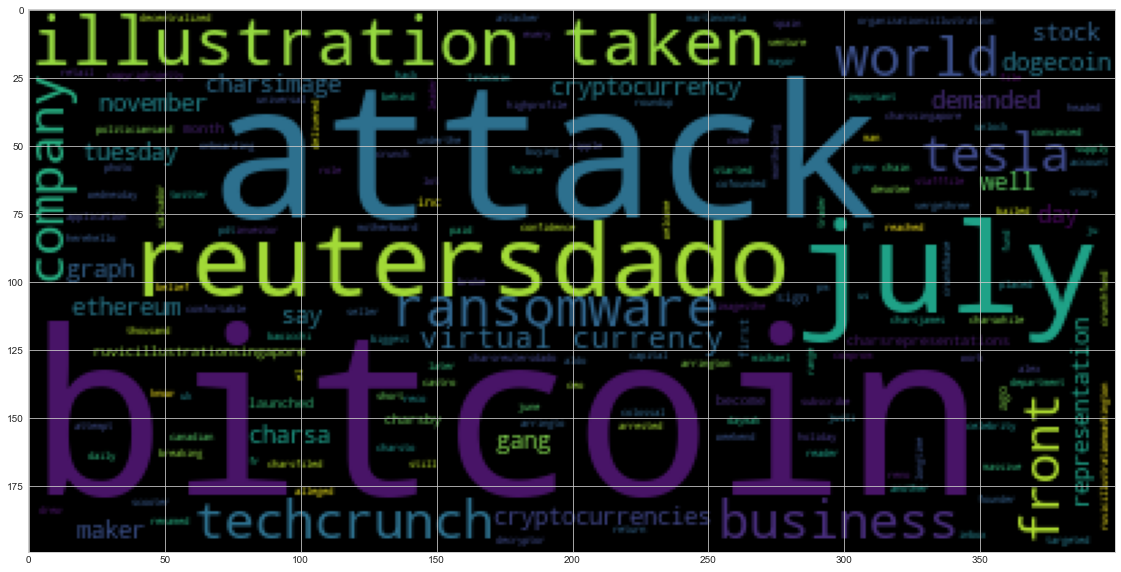

In [33]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(bt_input_words)
plt.imshow(wc)

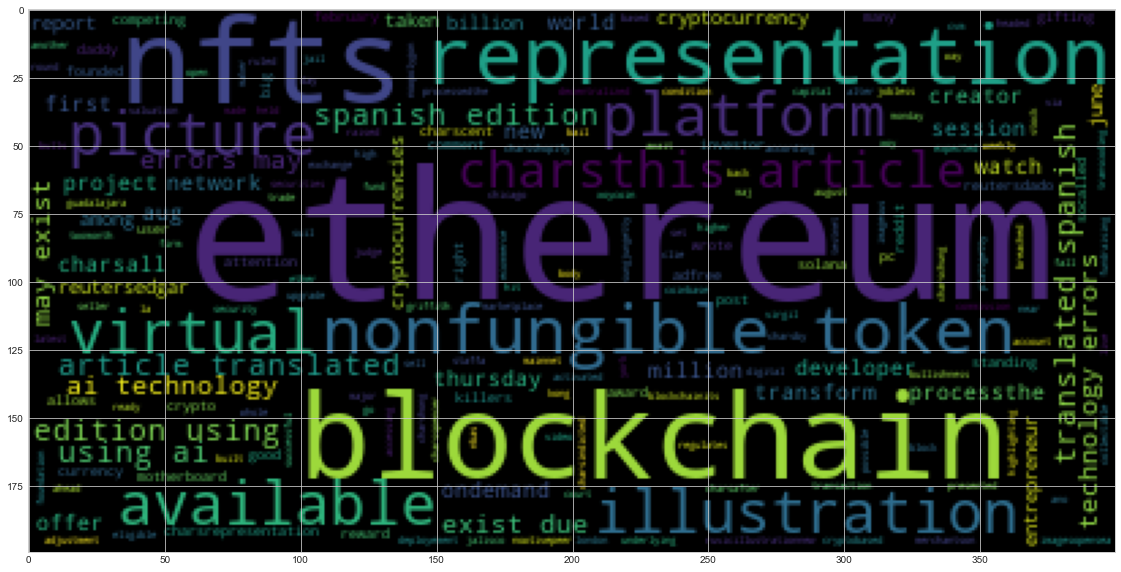

In [34]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(et_input_words)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [35]:
import spacy
from spacy import displacy

In [36]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [37]:
# Concatenate all of the Bitcoin text together
bitcoin_article=" "
for article in bitcoin_articles["articles"]:
    text=article["content"]
    bitcoin_article=bitcoin_article+""+text

In [38]:
# Run the NER processor on all of the text
btc_doc=nlp(bitcoin_article)
btc_doc.user_data['title']="Bitcoin NER"

In [39]:
# Render the visualization

displacy.render(btc_doc,style='ent')

In [40]:
# List all Entities
bitcoin_entities=[ent.text for ent in btc_doc.ents if ent.label_ in ['GPE', 'ORG']]

In [41]:
bitcoin_entities

['Reno',
 'El Salvador',
 'Aldo Baoicchi',
 'Daymak',
 'The Verge',
 'Daily Crunch',
 'Bitcoin and Ethereum',
 'Crunchbase',
 'Reuters',
 'UK',
 'Spain',
 'the US Department of Justi',
 'REUTERS',
 'Dado Ruvic/IllustrationSINGAPORE',
 'Reuters',
 'Reuters',
 'FILE',
 'REUTERS',
 'Dado Ruvic/Illustration\r\nSINGAPORE',
 'REUTERS',
 'Dado Ruvic/Illustration\r\nWelcome',
 'the Opening Bell',
 'Entrepreneur',
 'REUTERS',
 'Dado',
 'Reuters',
 'Tesla Inc',
 'Concord Acquisition Corp',
 'SPAC',
 'Reuters',
 'Reuters',
 'REUTERS',
 'Dado Ruvic/Illustration',
 'Reuters']

---

### Ethereum NER

In [43]:
# Concatenate all of the Ethereum text together
eth_article=" "
for article in ethereum_articles["articles"]:
    text=article["content"]
    eth_article=eth_article+""+text

In [44]:
# Run the NER processor on all of the text
eth_doc=nlp(eth_article)
eth_doc.user_data['title']="Ethereum NER"

In [45]:
# Render the visualization
displacy.render(eth_doc,style='ent')

In [46]:
# List all Entities
ethereum_entities=[ent.text for ent in eth_doc.ents if ent.label_ in ['GPE', 'ORG']]

In [47]:
ethereum_entities

['REUTERS',
 'Reuters',
 'Reuters',
 'AI',
 'Guadalajara',
 'Jalisco',
 'Chicago Bulls',
 'AI',
 'The Securities and Exchange Commission',
 'London',
 'Polygon',
 'Reuters',
 'REUTERS',
 'OpenSea',
 'Ethereum Foundation',
 'Platt/Getty Images',
 'US',
 'Non-Fungible Tokens',
 'dai',
 'REUTERS',
 'Entrepreneur',
 'Tesla, Square',
 'AI']

---